In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')
df=df.drop(['map_size','h_cache','mdd_cache'], axis=1)
df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']] = df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']].where(lambda df: df['expanded']!=0, np.nan)
df['search_time'] = df['cpu_time']-df['h_time']-df['mdd_time']
df['graph_time'] = df['h_time']-df['emvc_mvc_time']
df

,num_agents,density,disjoint,heuristic,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time
0,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,25,0.3,False,wdg,120.0,50.44664,44.182916,43.259056,10.0,0.463956,348.0,695.0,5.799767,0.923861
4070,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4071,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4072,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df[(df['expanded']!=0) & (df['heuristic']=='wdg') & (df['disjoint']==False)]
df['finished'] = (df['expanded'].notna())

In [4]:
groups = df.groupby(['num_agents','density','heuristic','disjoint','time_limit'],as_index=False).mean()
# groups[(groups['density']==0.) & (groups['time_limit']==time_limit)]
# groups['success_rate'] = groups['finished']/20
groups

,num_agents,density,heuristic,disjoint,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,finished
0,10,0.0,cg,False,60.0,0.587501,0.008610,0.0,0.0,0.161119,168.944444,336.888889,0.417773,0.008610,0.9
1,10,0.0,cg,True,60.0,0.303049,0.024810,0.0,0.0,0.111509,35.600000,56.850000,0.166730,0.024810,1.0
2,10,0.0,dg,False,60.0,0.081304,0.010854,0.0,0.2,0.053004,5.850000,10.700000,0.017446,0.010854,1.0
3,10,0.0,dg,True,60.0,0.067646,0.005994,0.0,0.2,0.049552,3.700000,6.200000,0.012100,0.005994,1.0
4,10,0.0,wdg,False,60.0,0.141757,0.055994,0.0,0.2,0.069406,5.850000,10.700000,0.016358,0.055994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,50,0.4,cg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
200,50,0.4,dg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
201,50,0.4,dg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
202,50,0.4,wdg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
# groups[(groups['disjoint']==False) & (groups['heuristic']=='cg') & (groups['density']==0.3)]

In [6]:
# groups[(groups['disjoint']==False) & (groups['heuristic']=='dg') & (groups['density']==0.3)]

In [7]:
# groups[(groups['disjoint']==False) & (groups['heuristic']=='wdg') & (groups['density']==0.3)]

In [45]:
# Dense Graph
def success_rate_graph(density, max_agents=50, time_limit=60 ,x_interval=10, size=(6,5), file=None):
    dense = groups[(groups['density']==density) & (groups['time_limit']==time_limit)]
    disjoint_settings = [True,False]
    heuristics_settings = ['cg','dg','wdg']
    plt.figure(figsize=size)
    ls=['-','--','-.']
    for d in disjoint_settings:
        i=0
        for h in heuristics_settings:
            view = dense[(dense['disjoint']==d) & (dense['heuristic']==h) & (dense['num_agents']<=max_agents) & (dense['num_agents']!=17)]
            name = h.upper()+'_disjoint' if d else h.upper()
            plt.plot(view['num_agents'], view['finished'], label=name, marker='o',alpha=0.7, linestyle=ls[i%3])
            i+=1
    plt.legend()
    plt.xlabel('Agents')
    plt.ylabel('Success Rate')
    plt.xticks(np.arange(10, max_agents, x_interval))
    if file:
        plt.savefig(file)
    plt.show()

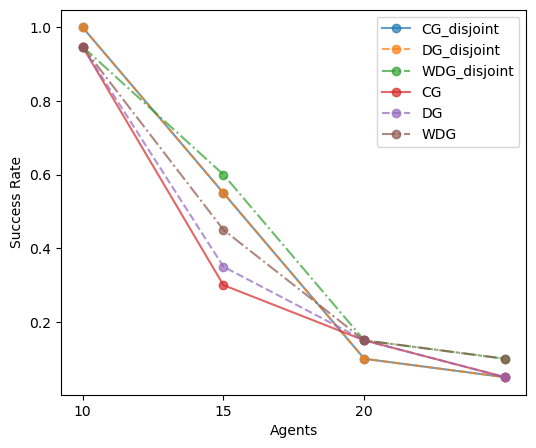

In [46]:
success_rate_graph(0.3, 25, 120, 5, file='./plots/success_03.png')
# success_rate_graph(0.3, 25, 120, 5)

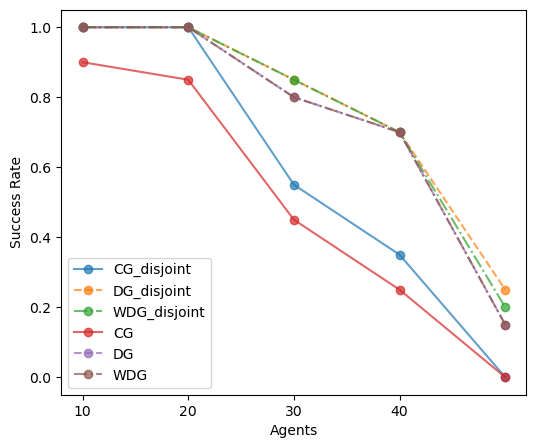

In [38]:
success_rate_graph(0, 50, 60, 10, file='./plots/success_00.png')

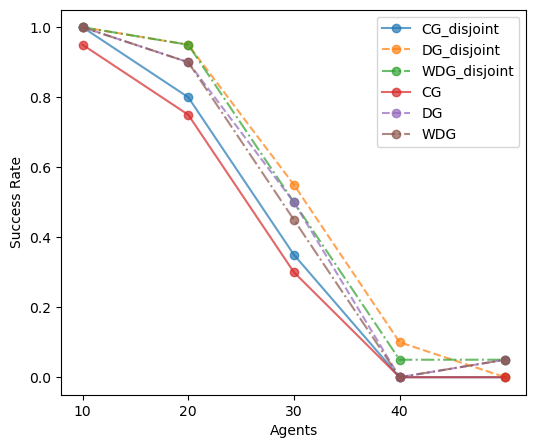

In [39]:
success_rate_graph(0.1,50,60,10, file='./plots/success_01.png')

In [40]:
groups[(groups['density']==0) & (groups['num_agents']<50) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.000000  0.200000  0.200000
20           0.100000  0.450000  0.550000
30           0.272727  0.705882  0.823529
40           0.857143  1.428571  1.571429

In [21]:
groups[(groups['density']==0.3) & (groups['num_agents']<=20) & (groups['disjoint']==True) & (groups['time_limit']==120)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic          cg        dg        wdg
num_agents                                
10           1.736842  1.789474   3.555556
15           3.000000  3.000000   8.833333
17           4.250000  4.250000   9.333333
20           4.500000  4.500000  11.666667

In [22]:
groups[(groups['density']==0.1) & (groups['num_agents']<=30) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.200000  0.400000  0.550000
20           0.375000  0.736842  1.052632
30           2.142857  2.454545  3.200000

In [23]:
groups[(groups['num_agents']==20) & (groups['density']<=0.3) & (groups['disjoint']==True) & (groups['time_limit']==60)].pivot(index=['density'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic         cg        dg        wdg
density                                  
0.0           0.1000  0.450000   0.550000
0.1           0.3750  0.736842   1.052632
0.2           2.1875  2.375000   4.875000
0.3           4.5000  4.500000  11.666667

In [55]:
groups1 = groups[((groups['density'] == 0) | ((groups['density']==0.3) & (groups['time_limit']==120))) & (groups['disjoint']==True) & (groups['num_agents']<=20)].groupby(['heuristic','density'], as_index=False).mean()
groups1 = groups1.set_index('heuristic')
groups1

,density,num_agents,disjoint,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,finished
heuristic,,,,,,,,,,,,,,
cg,0.0,15.0,True,60.0,2.195230,0.092990,0.000474,0.050000,0.340963,203.975000,346.775000,1.761276,0.092517,1.000000
cg,0.3,15.5,True,120.0,14.201941,3.426067,1.564319,3.371711,3.035073,888.287978,1646.887560,7.740802,1.861747,0.462500
dg,0.0,15.0,True,60.0,0.233299,0.040071,0.000151,0.325000,0.116133,8.650000,15.950000,0.077094,0.039920,1.000000
dg,0.3,15.5,True,120.0,17.660111,8.004859,1.951331,3.384868,2.807293,646.255383,1188.373206,6.847959,6.053527,0.462500
wdg,0.0,15.0,True,60.0,0.300009,0.090963,0.000473,0.375000,0.129571,9.050000,16.175000,0.079474,0.090490,1.000000
wdg,0.3,15.5,True,120.0,13.508084,7.792810,3.831278,8.347222,1.660859,470.104167,870.923611,4.054415,3.961532,0.461842


In [56]:
# groups1 = groups[(groups['density']==0.3) & (groups['time_limit']==60) & (groups['disjoint']==True) & (groups['num_agents']<=20)].groupby(['heuristic','density'], as_index=False).mean()
# groups1 = groups1.set_index('heuristic')
# groups1

In [57]:
groups1['ICBS'] = groups1['search_time']/groups1['expanded']*1000
groups1['Solve MVC/EWMVC'] = groups1['emvc_mvc_time']/groups1['expanded']*1000
groups1['Calculate MDD'] = groups1['mdd_time']/groups1['expanded']*1000
groups1['Compute Graph'] = groups1['graph_time']/groups1['expanded']*1000

In [58]:
groups1.drop(groups1.columns.difference(['density','ICBS','Solve MVC/EWMVC','Calculate MDD','Compute Graph']), 1, inplace=True)
# groups1 = groups1[[]]

In [59]:
def runtime_chart(density, size=(8,6), file=None):
    plt.figure(figsize=size)
    groups1[groups1['density']==density].drop('density',axis=1).plot(kind='bar', stacked=True)
    plt.ylabel('Runtime per node (ms)')
    ax = plt.gca()
    ax.set_ylim([0, 40])
    plt.legend(loc=2)
    if file:
        plt.savefig(file)
    plt.show()

<Figure size 800x600 with 0 Axes>

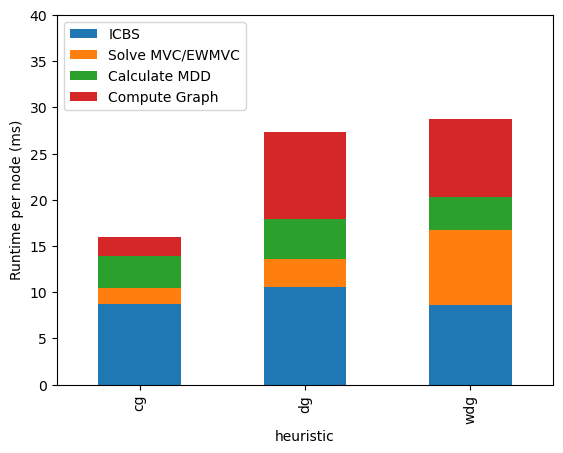

In [60]:
runtime_chart(0.3, file='./plots/runtime_03.png')

<Figure size 800x600 with 0 Axes>

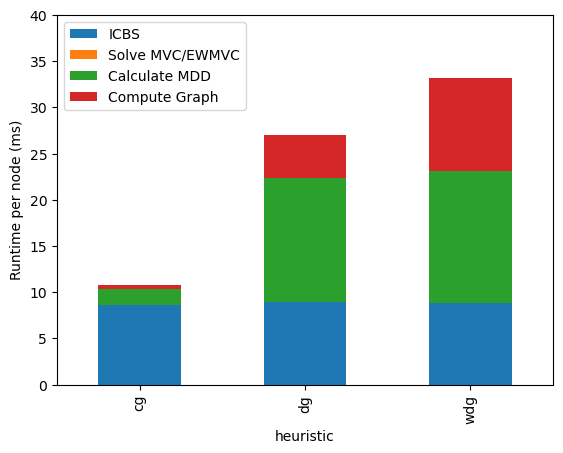

In [61]:
runtime_chart(0, file='./plots/runtime_00.png')